# Lab 0 - Python and Jupyter notebook introduction

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Warm-up Exercises 

Try the following commands on your jupyter notebook or python editor and see what output they produce.

In [1]:
a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [11]:
a = np.array([[3, 1],
              [1, 3]])
b = np.array([[3],
              [5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)
print(c * a)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]
[[1. 1.]
 [1. 1.]]


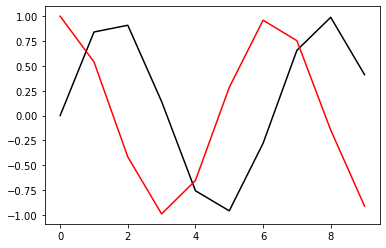

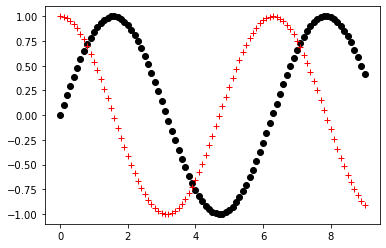

In [17]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');

t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


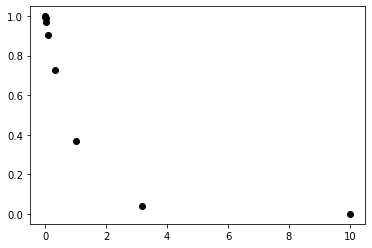

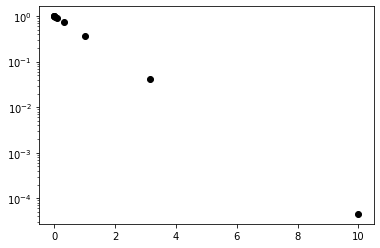

In [3]:
t = np.linspace(0, 10, 21)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)

plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok')

# Integration Function

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [7]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Save this program as `integral.py`. Now we can call it to compute $\int_0^\pi \sin(t) dt$
with an evenly sampled time series (`even.py`).

1.9954413183201944


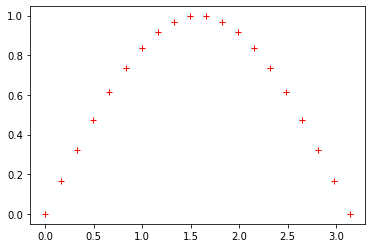

In [31]:
# number of samples
nt = 20
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

## Part 1

### Collaborators: None

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^\pi \sin(t) dt$? How can you improve the accuracy of your computation?



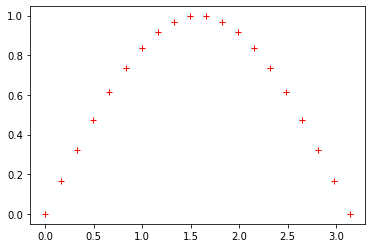

In [27]:
# number of samples
nt = 20
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+')

Since we are using the Riemann sum method of calculating integral, we can get to more precise answer by reducing the width of the integral.
We can do that in this case by increasing the number of samples.

In [29]:
# double the number of samples
nt = 40
t = np.linspace(0, np.pi, nt)
dt = t[1] - t[0]
y = np.sin(t)
c1 = integral(y, dt)

# 10 times the number of samples
nt = 200
t = np.linspace(0, np.pi, nt)
dt = t[1] - t[0]
y = np.sin(t)
c2 = integral(y, dt)

# 2000 times the number of samples
nt = 40000
t = np.linspace(0, np.pi, nt)
dt = t[1] - t[0]
y = np.sin(t)
c3 = integral(y, dt)

# compare value
print(c1,c2,c3)

1.9989184010578636 1.9999584621373305 1.9999999989718622


Using calculus we get that the exact answer for $\int_0^\pi \sin(t) dt$ is 2, and we see above that as the number of sample is increased, the integral output indeed approaches 2.

## Part 2

### Collaborators: None

For an unevenly spaced time series that depicts $\sin(4 \pi t^2)$ (so-called chirp function),
compute $\int_0^1 \sin(4 \pi t^2) dt$ (saved as `uneven.py`).

0.13609684944836983


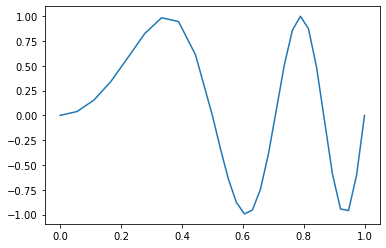

In [32]:
#uneven

nt = 10
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y)
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ for $nt = 100$. Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of `nt` values (e.g, 10, 50, 100, 500, 1000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

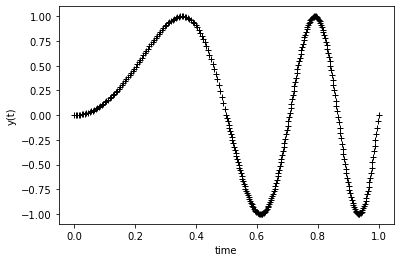

In [14]:
#ploting with nt = 100
nt = 100
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y, "k+")
plt.xlabel("time")
plt.ylabel("y(t)")
# compute sampling interval vector
dt = t[1:] - t[:-1]

0.13609684944836983 nt= 10
0.13716087327575752 nt= 100
0.13716768701408735 nt= 1000
0.13716775213707152 nt= 10000
0.137167752785352 nt= 100000


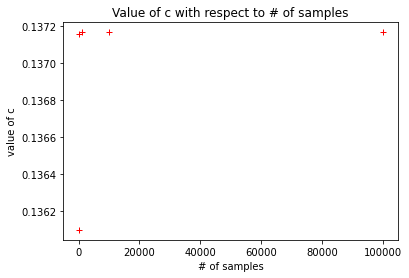

In [11]:
#initial value
nt = 10

#loop for greater nt values

for n in range(2,7):
    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values (f=2t)
    y = np.sin(2 * np.pi * 2 * t**2)
    # compute sampling interval vector
    dt = t[1:] - t[:-1]
    
    # print out the c value
    c = integral(y, dt)
    print(c, "nt=",nt)
    
    #plot the graph
    plt.plot(nt, c, "r+")
    plt.xlabel("# of samples")
    plt.ylabel("value of c")
    plt.title("Value of c with respect to # of samples")
    
    #raise nt by factors of 10
    nt = nt*10

The value of c converges to 0.1372 as the number of sample gets larger.

# Accuracy of Sampling

### Collaborators: None

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 1$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.
For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? What is the apparent frequency for the sampling time series? (Figure out
after how many points (N) the series repeats itself, then the apparent frequency = 1/(N*dt). You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a
sampling interval of $dt = 1$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

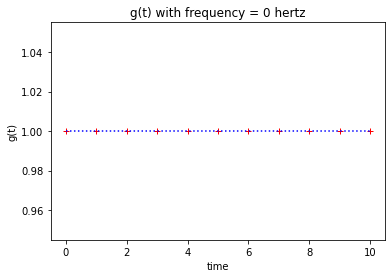

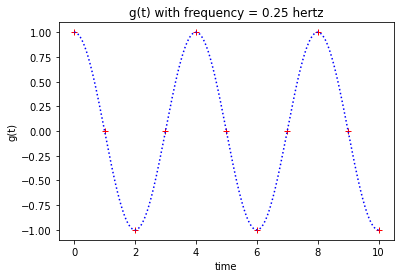

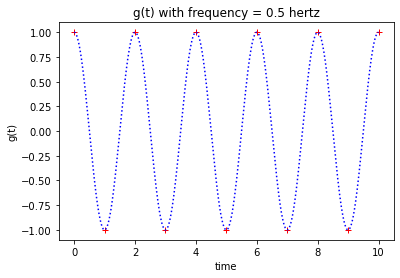

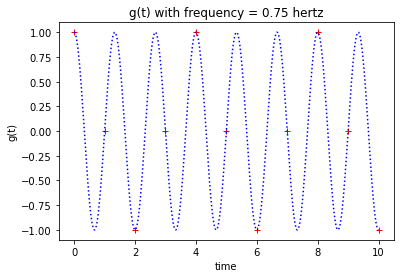

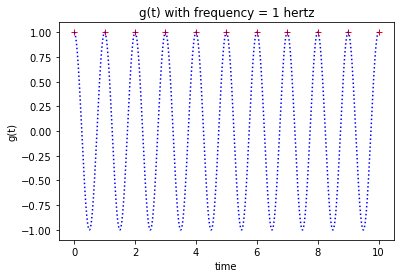

In [12]:
#sampling interval
dt = 1

#small interval close to the actual series
dt2 = 0.01

#end point for x-axis
end = 10

#x-axis variable
t1 = np.linspace(0,end,int(end/dt+1))
t2 = np.linspace(0,end,int(end/dt2))

#frequency = 0 hertz
f = 0
g1 = np.cos(2*np.pi*f*t1)
g2 = np.cos(2*np.pi*f*t2)
plt.plot(t1,g1,"r+", t2,g2,"b:")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("g(t) with frequency = 0 hertz")
plt.show()

#frequency = 0.25 hertz
f = 0.25
g1 = np.cos(2*np.pi*f*t1)
g2 = np.cos(2*np.pi*f*t2)
plt.plot(t1,g1,"r+", t2,g2,"b:")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("g(t) with frequency = 0.25 hertz")
plt.show()

#frequency = 0.5 hertz
f = 0.5
g1 = np.cos(2*np.pi*f*t1)
g2 = np.cos(2*np.pi*f*t2)
plt.plot(t1,g1,"r+", t2,g2,"b:")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("g(t) with frequency = 0.5 hertz")
plt.show()

#frequency = 0.75 hertz
f = 0.75
g1 = np.cos(2*np.pi*f*t1)
g2 = np.cos(2*np.pi*f*t2)
plt.plot(t1,g1,"r+", t2,g2,"b:")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("g(t) with frequency = 0.75 hertz")
plt.show()

#frequency = 1 hertz
f = 1
g1 = np.cos(2*np.pi*f*t1)
g2 = np.cos(2*np.pi*f*t2)
plt.plot(t1,g1,"r+", t2,g2,"b:")
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("g(t) with frequency = 1 hertz")
plt.show()

Based on observation, the number of points it takes for the sampling time series to repeat is 4 points. So the apparent frequency is 1/4 = 0.25 hertz.
After playing with the graph and frequency for a while, it seems that any function with frequency less than or equal to the apparent frequency of the sampling series can be represented fairly accurate.
And, as soon as the frequency becomes greater than the apparent frequency of the sampling series, the graph becomes distorted, and it is hard to see the oscillation.
So I'm going to guess that the maximum frequency that can be fairly represented by the sampling series is the apparent frequency, which is 0.25 hertz.